<a href="https://colab.research.google.com/github/polyphemus287/IBM-Capstone/blob/main/jupyter_labs_eda_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [5]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [7]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

if response.status_code == 200:
    dataset_part_2_csv = response.content
    df = pd.read_csv(io.BytesIO(dataset_part_2_csv))
    print(df.head(5))
else:
    print("Failed to fetch data:", response.status_code)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


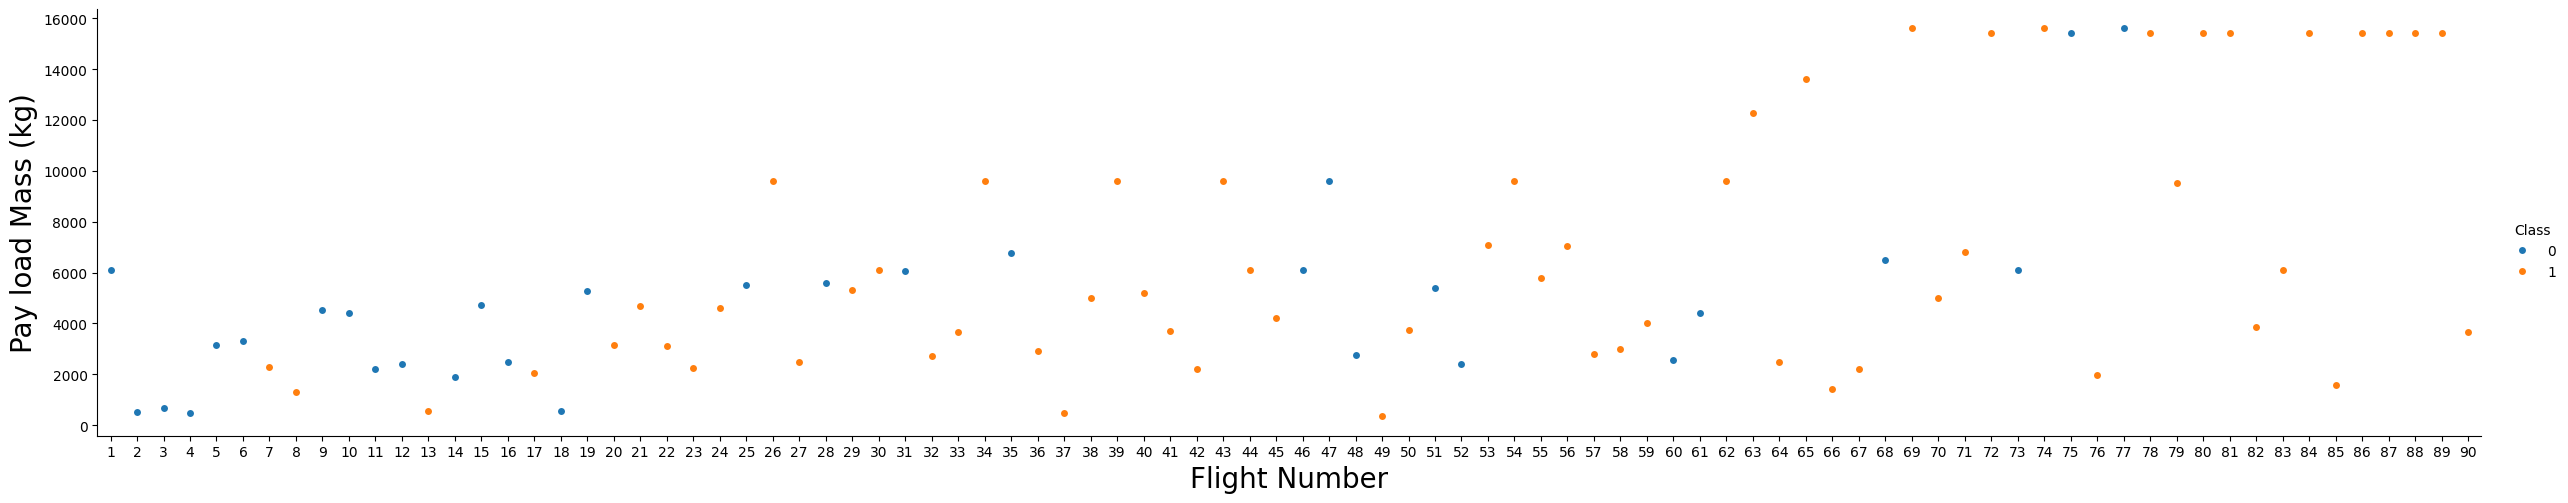

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


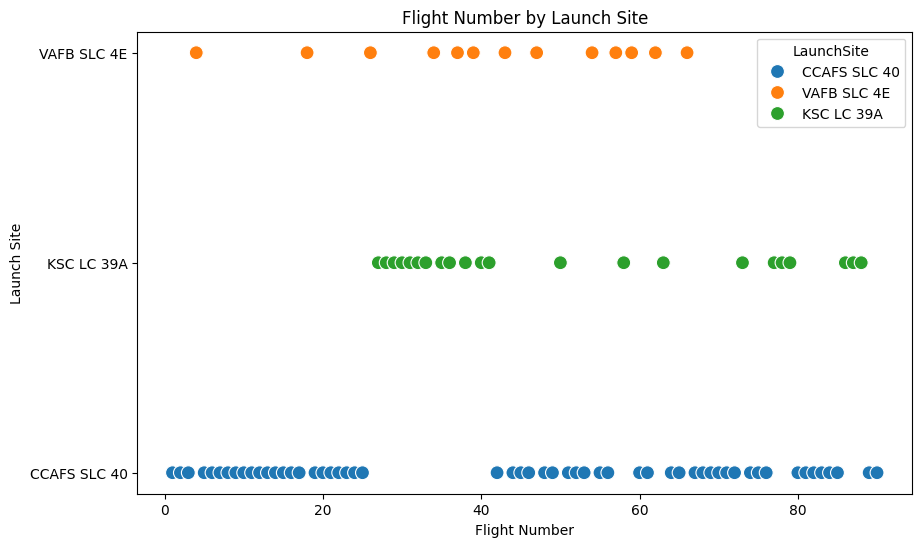

In [9]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

df['LaunchSiteCode'] = df['LaunchSite'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='LaunchSiteCode', data=df, hue='LaunchSite', s=100)
plt.title('Flight Number by Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.yticks(ticks=df['LaunchSiteCode'].unique(), labels=df['LaunchSite'].unique())  # Map numerical codes back to site names
plt.show()

In [10]:
print(df['Outcome'].unique())

['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']


In [11]:
print(df['Orbit'].unique())

['LEO' 'ISS' 'PO' 'GTO' 'ES-L1' 'SSO' 'HEO' 'MEO' 'VLEO' 'SO' 'GEO']


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


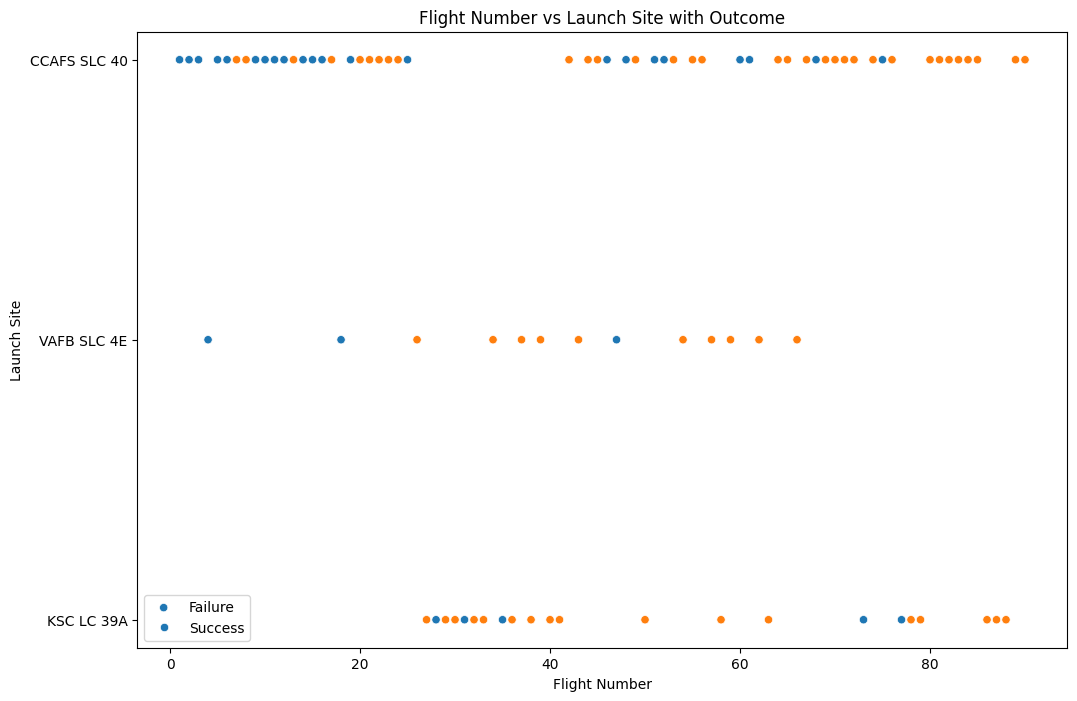

In [42]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)

# Set the title and labels
plt.title('Flight Number vs Launch Site with Outcome')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Show the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


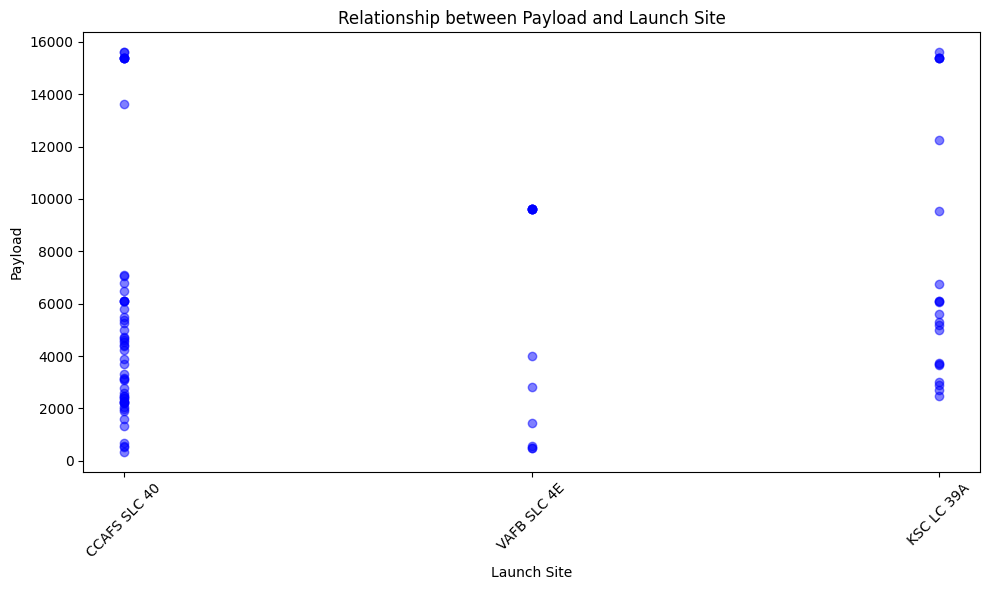

In [43]:
### TASK 2: Visualize the relationship between Payload and Launch Site
payload = df['PayloadMass']
launch_site = df['LaunchSite']

# Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(launch_site, payload, color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Launch Site')
plt.ylabel('Payload')
plt.title('Relationship between Payload and Launch Site')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying plot
plt.tight_layout()
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


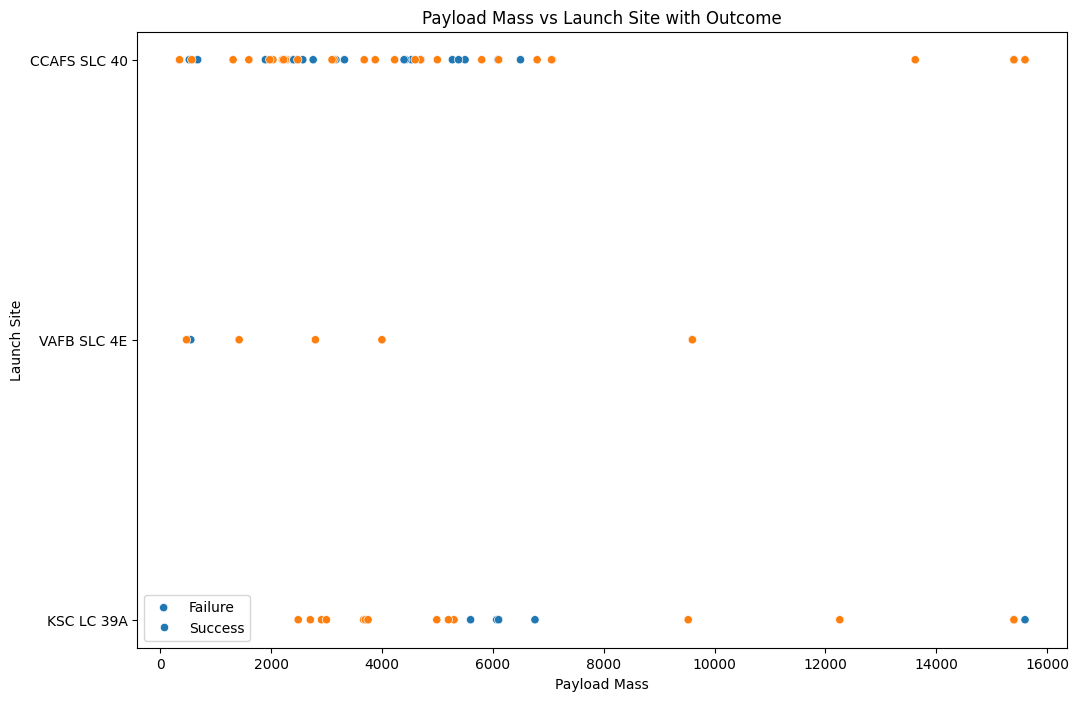

In [44]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the Class value
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)

# Set the title and labels
plt.title('Payload Mass vs Launch Site with Outcome')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')

plt.legend(labels=['Failure', 'Success'])

# Show the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


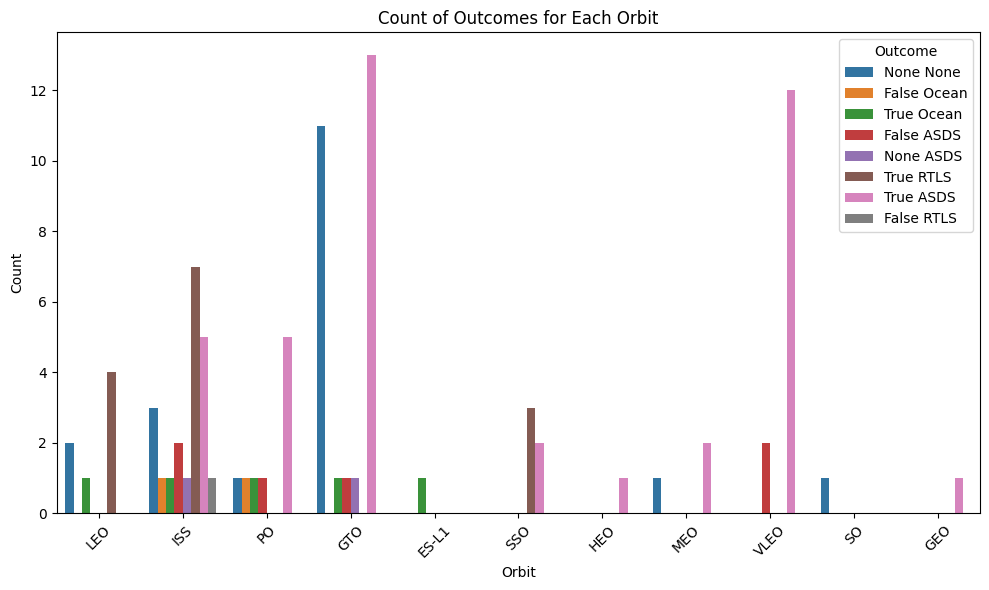

In [45]:
### TASK  3: Visualize the relationship between success rate of each orbit type

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Orbit', hue='Outcome', data=df)

# Adding labels and title
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.title('Count of Outcomes for Each Orbit')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying plot
plt.tight_layout()
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


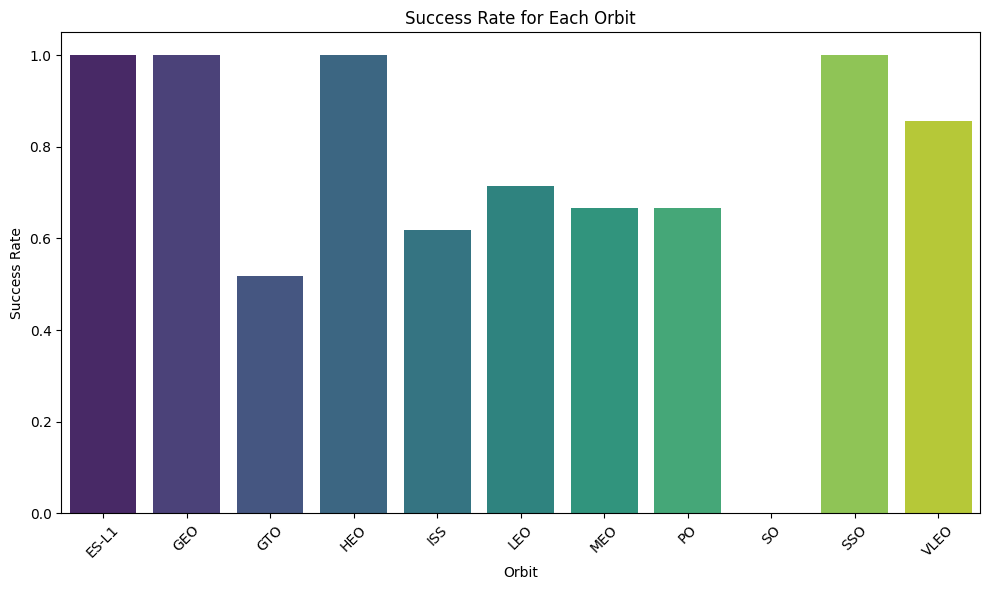

In [46]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Group by 'Orbit' and calculate the mean of 'Class' for each group
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', hue='Orbit', data=orbit_success, palette='viridis', legend=False)

# Adding labels and title
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Orbit')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying plot
plt.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


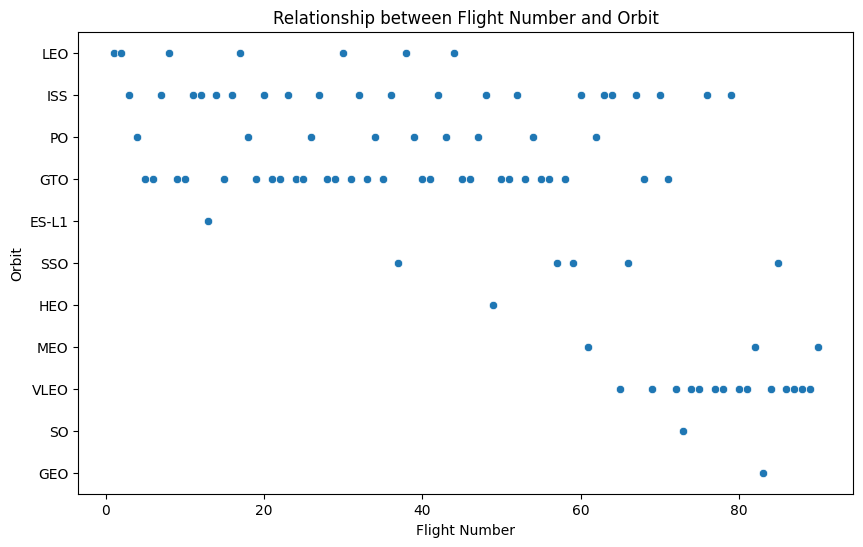

In [47]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit')

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Relationship between Flight Number and Orbit')

# Show the plot
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


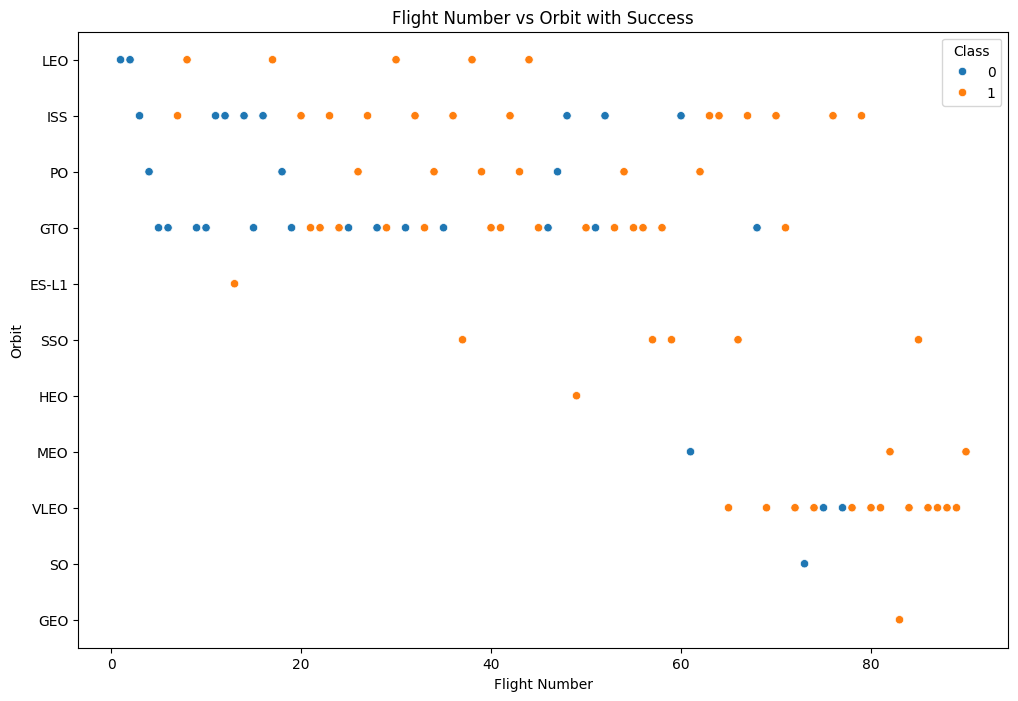

In [50]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot scatter plot with hue based on class value
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')

# Set title and labels
plt.title('Flight Number vs Orbit with Success')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

# Show the plot
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


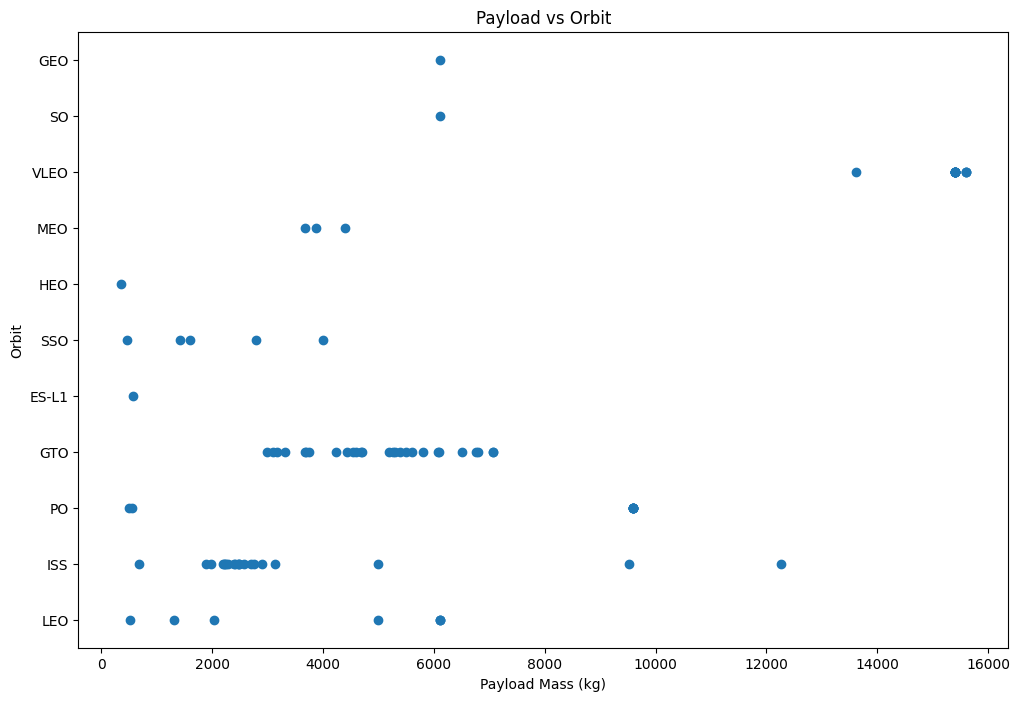

In [49]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['PayloadMass'], df['Orbit'])

# Set the title and labels
plt.title('Payload vs Orbit')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


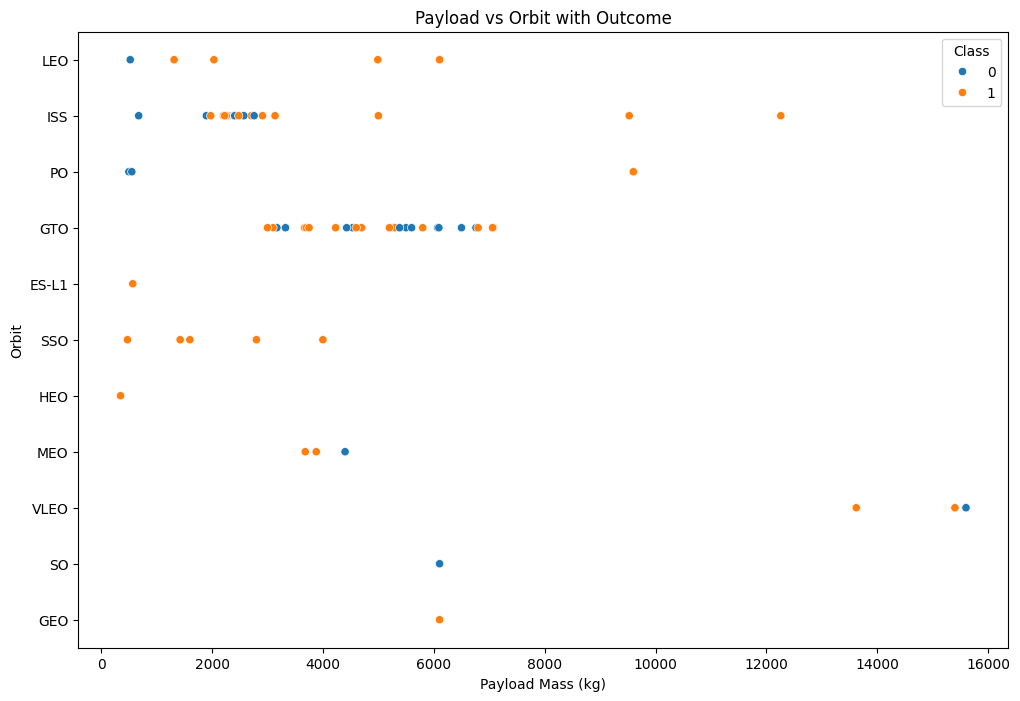

In [51]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the Class value
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

# Set the title and labels
plt.title('Payload vs Orbit with Outcome')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


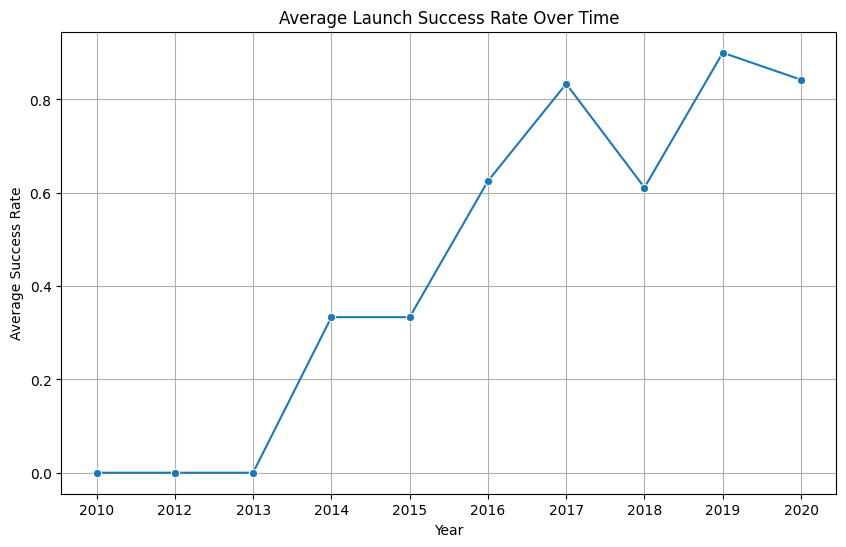

In [22]:
### TASK  6: Visualize the launch success yearly trend
# A function to Extract years from the date
def extract_year(date):
    return date.split("-")[0]

# Extract years from the Date column
df['Year'] = df['Date'].apply(extract_year)

# Calculate the average success rate for each year
average_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=average_success_rate, marker='o')

# Set the title and labels
plt.title('Average Launch Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')

# Show the plot
plt.grid(True)
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [23]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,LaunchSiteCode,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,2013


In [24]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

you can observe that the sucess rate since 2013 kept increasing till 2020


In [25]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [26]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [27]:
### TASK  7: Create dummy variables to categorical columns

# Define the columns to be one-hot encoded
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding using get_dummies
encoded_columns = pd.get_dummies(features[columns_to_encode])

# Concatenate the encoded columns with the original features dataframe
features_one_hot = pd.concat([features, encoded_columns], axis=1)

# Display the results
print(features_one_hot.head())

   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ...  Serial_B1048 Serial_B1049  Serial_B1050  \
0  False        NaN    1.0  ...         False        False         False   
1  False        NaN    1.0  ...         False        False         False   
2  False        NaN    1.0  ...         False        False         False   
3  False        NaN    1.0  ...         False        False         False   
4  False        NaN    1.0  ...         False        False         False   

   Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  Serial_B1

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [33]:
# HINT: Use get_dummies() function on the categorical columns
# Using get_dummies to one-hot encode categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the resulting DataFrame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
### TASK  8: Cast all numeric columns to `float64`
# Convert all numeric columns to float64
# Filter numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['float64', 'int64']).columns
# Convert numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype(float)

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [35]:
# HINT: use astype function
# Convert all numeric columns to float64
features_one_hot = features_one_hot.astype(float)


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
